In [20]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import rasterio as rio
from shapely.geometry import Polygon
from mpl_toolkits.basemap import Basemap  
import matplotlib.pyplot as plt
from shapely.ops import unary_union
import os
import glob
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
all_DEMs =  gpd.read_file('Plotting\\labels\\all_DEM_labels.geojson')
all_OP =  gpd.read_file('Plotting\\labels\\all_OP_labels.geojson')
common_DEMs = gpd.read_file('Plotting\\labels\\common_DEM_labels.geojson')
common_OT = gpd.read_file('Plotting\\labels\\all_OT_labels.geojson')

_______

In [21]:
import pandas as pd
import geopandas as gpd

# Load GeoJSON file
file_path = "Plotting\\boundries\\herschel_DEM_OT.geojson"
overlap_herschel = gpd.read_file(file_path)

# Assuming common_DEMs and common_OT are already loaded and have a 'geometry' column
years = [2017, 2018, 2019, 2020, 2021, 2022]
regions = ['herschel']

# DataFrames to store sums and statistics
data = pd.DataFrame(index=years, columns=['DEM_Volume_Change',
                                          'OT_Normal_Same', 'OT_Normal_Previous', 'OT_Normal_Following',
                                          'OT_Erosion_Same', 'OT_Erosion_Previous', 'OT_Erosion_Following',
                                          'OT_Dilation_Same', 'OT_Dilation_Previous', 'OT_Dilation_Following'])

stats_data = pd.DataFrame(index=years, columns=['Count_DEM_Volume_Change', 'Sum_DEM_Volume_Change',
                                                'Count_OT_Normal_Same', 'Sum_OT_Normal_Same',
                                                'Count_OT_Normal_Previous', 'Sum_OT_Normal_Previous',
                                                'Count_OT_Normal_Following', 'Sum_OT_Normal_Following',
                                                'Count_OT_Erosion_Same', 'Sum_OT_Erosion_Same',
                                                'Count_OT_Erosion_Previous', 'Sum_OT_Erosion_Previous',
                                                'Count_OT_Erosion_Following', 'Sum_OT_Erosion_Following',
                                                'Count_OT_Dilation_Same', 'Sum_OT_Dilation_Same',
                                                'Count_OT_Dilation_Previous', 'Sum_OT_Dilation_Previous',
                                                'Count_OT_Dilation_Following', 'Sum_OT_Dilation_Following'])

common_DEMs['year_end'] = common_DEMs['year_end'].astype(int)
common_OT['year'] = common_OT['year'].astype(int)

# Spatial filter for data within the defined GeoJSON area
# Specify custom index names to avoid the default 'index_left' and 'index_right'
common_DEMs = gpd.sjoin(common_DEMs, overlap_herschel, how="inner", op='intersects', lsuffix='_left', rsuffix='_rightds')
common_OT = gpd.sjoin(common_OT, overlap_herschel, how="inner", op='intersects', lsuffix='_left', rsuffix='_rightds')

for region in regions:
    for year in years:
        dems = common_DEMs[(common_DEMs['region'] == region) & (common_DEMs['year_end'] == year)]['total_volume_change']
        data.loc[year, 'DEM_Volume_Change'] = dems.sum()
        stats_data.loc[year, 'Count_DEM_Volume_Change'] = dems.count()
        stats_data.loc[year, 'Sum_DEM_Volume_Change'] = dems.sum()
        
        for metric in ['normal', 'erosion', 'dilation']:
            for time in ['same', 'previous', 'following']:
                col_name = f'OT_{metric.capitalize()}_{time.capitalize()}'
                ot_data = common_OT[(common_OT['region'] == region) & (common_OT['year'] == year)][f'{metric}_{time}']
                
                data.loc[year, col_name] = ot_data.sum()
                stats_data.loc[year, f'Count_{col_name}'] = ot_data.count()
                stats_data.loc[year, f'Sum_{col_name}'] = ot_data.sum()

# Display the data and stats DataFrames
display(data)
display(stats_data)


,DEM_Volume_Change,OT_Normal_Same,OT_Normal_Previous,OT_Normal_Following,OT_Erosion_Same,OT_Erosion_Previous,OT_Erosion_Following,OT_Dilation_Same,OT_Dilation_Previous,OT_Dilation_Following
2017,-1137759.387207,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018,-1236012.417603,-1180505.76725,-1172218.903303,0.0,-941796.744823,-935179.904652,0.0,-1180505.776596,-1172218.804884,0.0
2019,0.0,0.0,-1392859.355164,-1479106.296539,0.0,-1159287.698841,-1151657.497597,0.0,-1392859.371567,-1479106.30188
2020,-1627047.259521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Count_DEM_Volume_Change,Sum_DEM_Volume_Change,Count_OT_Normal_Same,Sum_OT_Normal_Same,Count_OT_Normal_Previous,Sum_OT_Normal_Previous,Count_OT_Normal_Following,Sum_OT_Normal_Following,Count_OT_Erosion_Same,Sum_OT_Erosion_Same,Count_OT_Erosion_Previous,Sum_OT_Erosion_Previous,Count_OT_Erosion_Following,Sum_OT_Erosion_Following,Count_OT_Dilation_Same,Sum_OT_Dilation_Same,Count_OT_Dilation_Previous,Sum_OT_Dilation_Previous,Count_OT_Dilation_Following,Sum_OT_Dilation_Following
2017,4,-1137759.387207,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
2018,6,-1236012.417603,10,-1180505.76725,10,-1172218.903303,0,0.0,10,-941796.744823,10,-935179.904652,0,0.0,10,-1180505.776596,10,-1172218.804884,0,0.0
2019,0,0.0,0,0.0,10,-1392859.355164,10,-1479106.296539,0,0.0,10,-1159287.698841,10,-1151657.497597,0,0.0,10,-1392859.371567,10,-1479106.30188
2020,7,-1627047.259521,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
2021,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
2022,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0


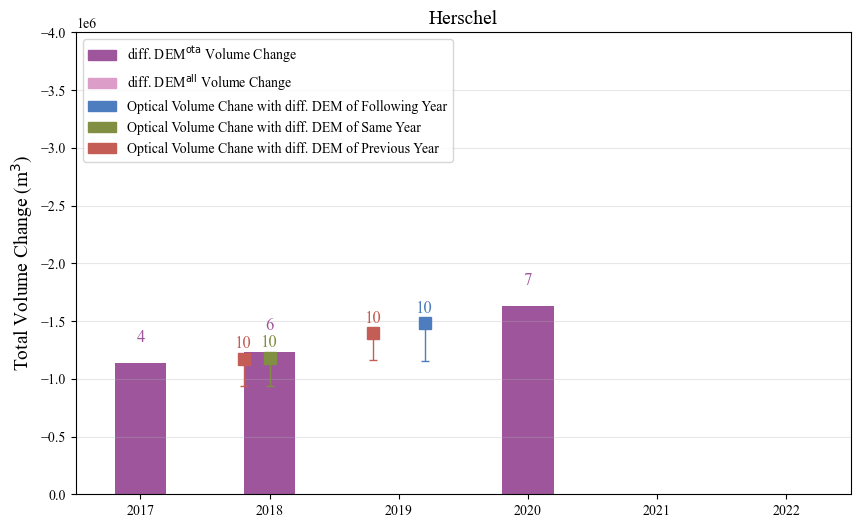

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import matplotlib

# Set the font to Times New Roman for all text
matplotlib.rcParams['font.family'] = 'Times New Roman'

# Assuming 'data' and 'stats_data' are already defined and structured as DataFrames
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting DEM Volume Change
dem_bars = ax.bar(data.index, data['DEM_Volume_Change'], color='#9E559C', width=0.4, label=r'diff. DEM$^{\text{ota}}$ Volume Change')

# Adding counts directly above the DEM bars
for i, year in enumerate(data.index):
    dem_count = stats_data.loc[year, 'Count_DEM_Volume_Change']
    if dem_count > 0:  # Only display non-zero counts
        ax.text(year, data['DEM_Volume_Change'][year] - 150000, f'{dem_count}', ha='center', va='bottom', color='#9E559C', fontsize=12)

# New defined colors for each suffix type
colors = {'_Following': '#4D7DBF', '_Same': '#818F42', '_Previous': '#C55D57'}

# Customize the shifts here
bar_width = 0.4
shift_value = 0.2  # Adjust this value to control spacing
shifts = [-shift_value, 0, shift_value]

# Adjusting the order and position of the labels
labels_added = {}
for shift, label in zip(shifts, ['_Previous', '_Same', '_Following']):
    normal_values = data[f'OT_Normal{label}']
    x_positions = [x + shift for x in data.index]
    for x_pos, year in zip(x_positions, data.index):
        if normal_values[year] != 0:
            dilation_error = abs(normal_values[year] - data.loc[year, f'OT_Dilation{label}'])
            erosion_error = abs(data.loc[year, f'OT_Erosion{label}'] - normal_values[year])
            label_key = f'Optical Volume with diff. DEM of {label.strip("_")} Year'
            if label_key not in labels_added:
                ax.errorbar(x_pos, normal_values[year], yerr=[[dilation_error], [erosion_error]], fmt='s', color=colors[label], 
                            ecolor=colors[label], elinewidth=1, capsize=3, markersize=8, label=label_key)
                labels_added[label_key] = True
            else:
                ax.errorbar(x_pos, normal_values[year], yerr=[[dilation_error], [erosion_error]], fmt='s', color=colors[label], 
                            ecolor=colors[label], elinewidth=1, capsize=3, markersize=8)
                
            count = stats_data.loc[year, f'Count_OT_Normal{label}']
            if count > 0:  # Only display non-zero counts
                ax.text(x_pos, normal_values[year] - 60000, f'{count}', ha='center', va='bottom', color=colors[label], fontsize=12)

# Dummy bars for additional legend entries with the same dimensions as the DEM bars
legend_bar_ota = mpatches.Patch(color='#9E559C', label=r'diff. DEM$^{\text{ota}}$ Volume Change')
legend_bar_all = mpatches.Patch(color='#DC9EC9', label=r'diff. DEM$^{\text{all}}$ Volume Change')

# Collecting handles for optical points
optical_handles = [mpatches.Patch(color=colors[label], label=f'Optical Volume with diff. DEM of {label.strip("_")} Year') for label in colors]

# Setting labels and handles for the legend in the desired order
handles = [legend_bar_ota, legend_bar_all] + optical_handles
labels = [r'diff. DEM$^{\text{ota}}$ Volume Change', r'diff. DEM$^{\text{all}}$ Volume Change'] + [f'Optical Volume Chane with diff. DEM of {label.strip("_")} Year' for label in colors]

ax.set_xlabel('')
ax.set_ylabel('Total Volume Change (m$^3$)', fontsize=14)  # Using LaTeX for cubic meters
ax.set_ylim(-4000000, 0)
ax.set_xlim(2016.5, 2022.5)
ax.set_title('Herschel', fontsize=14)
ax.set_xticks(data.index)
ax.set_xticklabels(data.index)
ax.grid(axis='y', linestyle='-', alpha=0.3)

# Move the legend to the upper left corner
ax.legend(handles=handles, labels=labels, loc='upper left')

# Inverting Y-axis for better visualization
ax.invert_yaxis()

plt.show()


____________

now for OP the same


In [35]:
import pandas as pd
import geopandas as gpd

# Load GeoJSON file
file_path = "Plotting\\boundries\\herschel_DEM_geojson.geojson"
overlap_herschel = gpd.read_file(file_path)

# Assuming all_DEMs and all_OP are already loaded and have a 'geometry' column
years = [2017, 2018, 2019, 2020, 2021, 2022]
regions = ['herschel']

# DataFrames to store sums and statistics
data = pd.DataFrame(index=years, columns=['DEM_Volume_Change',
                                          'OP_Normal_Same', 'OP_Normal_Previous', 'OP_Normal_Following',
                                          'OP_Erosion_Same', 'OP_Erosion_Previous', 'OP_Erosion_Following',
                                          'OP_Dilation_Same', 'OP_Dilation_Previous', 'OP_Dilation_Following'])

stats_data = pd.DataFrame(index=years, columns=['Count_DEM_Volume_Change', 'Sum_DEM_Volume_Change',
                                                'Count_OP_Normal_Same', 'Sum_OP_Normal_Same',
                                                'Count_OP_Normal_Previous', 'Sum_OP_Normal_Previous',
                                                'Count_OP_Normal_Following', 'Sum_OP_Normal_Following',
                                                'Count_OP_Erosion_Same', 'Sum_OP_Erosion_Same',
                                                'Count_OP_Erosion_Previous', 'Sum_OP_Erosion_Previous',
                                                'Count_OP_Erosion_Following', 'Sum_OP_Erosion_Following',
                                                'Count_OP_Dilation_Same', 'Sum_OP_Dilation_Same',
                                                'Count_OP_Dilation_Previous', 'Sum_OP_Dilation_Previous',
                                                'Count_OP_Dilation_Following', 'Sum_OP_Dilation_Following'])

all_DEMs['year_end'] = all_DEMs['year_end'].astype(int)
all_OP['year'] = all_OP['year'].astype(int)

# Spatial filter for data within the defined GeoJSON area
# Specify custom index names to avoid the default 'index_left' and 'index_right'
all_DEMs = gpd.sjoin(all_DEMs, overlap_herschel, how="inner", op='intersects', lsuffix='_left', rsuffix='_righdtdd2')
all_OP = gpd.sjoin(all_OP, overlap_herschel, how="inner", op='intersects', lsuffix='_left', rsuffix='_righdtdd2')

for region in regions:
    for year in years:
        # Filtering and processing data for each year and region
        dems = all_DEMs[(all_DEMs['region'] == region) & (all_DEMs['year_end'] == year)]['total_volume_change']
        data.loc[year, 'DEM_Volume_Change'] = dems.sum()
        stats_data.loc[year, 'Count_DEM_Volume_Change'] = dems.count()
        stats_data.loc[year, 'Sum_DEM_Volume_Change'] = dems.sum()
        
        for metric in ['normal', 'erosion', 'dilation']:
            for time in ['same', 'previous', 'following']:
                col_name = f'OP_{metric.capitalize()}_{time.capitalize()}'
                op_data = all_OP[(all_OP['region'] == region) & (all_OP['year'] == year)][f'{metric}_{time}']
                
                data.loc[year, col_name] = op_data.sum()
                stats_data.loc[year, f'Count_{col_name}'] = op_data.count()
                stats_data.loc[year, f'Sum_{col_name}'] = op_data.sum()

# Display the data and stats DataFrames
display(data)
display(stats_data)


,DEM_Volume_Change,OP_Normal_Same,OP_Normal_Previous,OP_Normal_Following,OP_Erosion_Same,OP_Erosion_Previous,OP_Erosion_Following,OP_Dilation_Same,OP_Dilation_Previous,OP_Dilation_Following
2017,-1493070.513916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018,-1487848.277283,-1254298.345375,-1194542.765808,0.0,-853200.180626,-823142.272377,0.0,-1254298.337364,-1194542.771912,0.0
2019,0.0,0.0,-1707469.869661,-1673154.305828,0.0,-1167291.833496,-1125765.912247,0.0,-1707469.866276,-1673154.114902
2020,-3184584.714127,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021,0.0,0.0,-1840231.715918,0.0,0.0,-1231330.411434,0.0,0.0,-1840231.702137,0.0
2022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Count_DEM_Volume_Change,Sum_DEM_Volume_Change,Count_OP_Normal_Same,Sum_OP_Normal_Same,Count_OP_Normal_Previous,Sum_OP_Normal_Previous,Count_OP_Normal_Following,Sum_OP_Normal_Following,Count_OP_Erosion_Same,Sum_OP_Erosion_Same,Count_OP_Erosion_Previous,Sum_OP_Erosion_Previous,Count_OP_Erosion_Following,Sum_OP_Erosion_Following,Count_OP_Dilation_Same,Sum_OP_Dilation_Same,Count_OP_Dilation_Previous,Sum_OP_Dilation_Previous,Count_OP_Dilation_Following,Sum_OP_Dilation_Following
2017,16,-1493070.513916,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
2018,12,-1487848.277283,22,-1254298.345375,22,-1194542.765808,0,0.0,22,-853200.180626,22,-823142.272377,0,0.0,22,-1254298.337364,22,-1194542.771912,0,0.0
2019,0,0.0,0,0.0,34,-1707469.869661,34,-1673154.305828,0,0.0,34,-1167291.833496,34,-1125765.912247,0,0.0,34,-1707469.866276,34,-1673154.114902
2020,35,-3184584.714127,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
2021,0,0.0,0,0.0,40,-1840231.715918,0,0.0,0,0.0,40,-1231330.411434,0,0.0,0,0.0,40,-1840231.702137,0,0.0
2022,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0


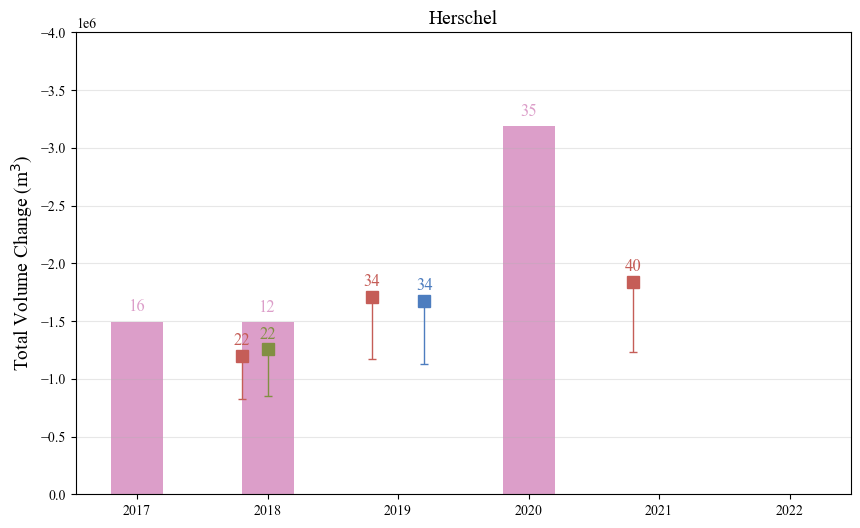

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

# Set the font to Arial for all text
matplotlib.rcParams['font.family'] = 'Times New Roman'

# Assuming 'data' and 'stats_data' are already defined and structured as DataFrames
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting DEM Volume Change
dem_bars = ax.bar(data.index, data['DEM_Volume_Change'], color='#DC9EC9', width=0.4, label=r'diff. DEM$^{\text{all}}$ Volume Change')

# Adding counts directly above the DEM bars
for i, year in enumerate(data.index):
    dem_count = stats_data.loc[year, 'Count_DEM_Volume_Change']
    if dem_count > 0:  # Only display non-zero counts
        ax.text(year, data['DEM_Volume_Change'][year] - 60000, f'{dem_count}', ha='center', va='bottom', color='#DC9EC9', fontsize=12)

# New defined colors for each suffix type
colors = {'_Following': '#4D7DBF', '_Same': '#818F42', '_Previous': '#C55D57'}

# Customize the shifts here
bar_width = 0.4
shift_value = 0.2  # Adjust this value to control spacing
shifts = [-shift_value, 0, shift_value]

# Adjusting the order and position of the labels
labels_added = {}
for shift, label in zip(shifts, ['_Previous', '_Same', '_Following']):
    normal_values = data[f'OP_Normal{label}']
    x_positions = [x + shift for x in data.index]
    for x_pos, year in zip(x_positions, data.index):
        if normal_values[year] != 0:
            dilation_error = abs(normal_values[year] - data.loc[year, f'OP_Dilation{label}'])
            erosion_error = abs(data.loc[year, f'OP_Erosion{label}'] - normal_values[year])
            label_key = f'OT Volume with diff. DEM of {label.strip("_")}  Year'
            if label_key not in labels_added:
                ax.errorbar(x_pos, normal_values[year], yerr=[[dilation_error], [erosion_error]], fmt='s', color=colors[label], 
                            ecolor=colors[label], elinewidth=1, capsize=3, markersize=8, label=label_key)
                labels_added[label_key] = True
            else:
                ax.errorbar(x_pos, normal_values[year], yerr=[[dilation_error], [erosion_error]], fmt='s', color=colors[label], 
                            ecolor=colors[label], elinewidth=1, capsize=3, markersize=8)
                
            count = stats_data.loc[year, f'Count_OP_Normal{label}']
            if count > 0:  # Only display non-zero counts
                ax.text(x_pos, normal_values[year] - 60000, f'{count}', ha='center', va='bottom', color=colors[label], fontsize=12)

ax.set_xlabel('')
ax.set_ylabel('Total Volume Change (m$^3$)', fontsize=14)  # Using LaTeX for cubic meters
ax.set_ylim(-4000000, 0)
ax.set_title('Herschel', fontsize=14)
ax.set_xticks(data.index)
ax.set_xticklabels(data.index)
ax.grid(axis='y', linestyle='-', alpha=0.3)
# Inverting Y-axis for better visualization
ax.invert_yaxis()

plt.show()


_______


In [14]:
import pandas as pd
import geopandas as gpd

# Function to calculate mean values and create a summary table
def calculate_mean_values():
    # Convert 'year_end' and 'year' columns to integers
    common_DEMs['year_end'] = common_DEMs['year_end'].astype(int)
    common_OT['year'] = common_OT['year'].astype(int)
    all_DEMs['year_end'] = all_DEMs['year_end'].astype(int)
    all_OP['year'] = all_OP['year'].astype(int)
    
    # Create a complete index of years
    years = pd.Series(range(2016, 2023), name='Year')
    
    # Group by year for DEMs and calculate the mean total_volume_change
    common_dem_means = common_DEMs.groupby('year_end')['total_volume_change'].mean().reset_index()
    common_dem_means.rename(columns={'year_end': 'Year', 'total_volume_change': 'Common_DEM_Volume_Change_Mean'}, inplace=True)
    
    all_dem_means = all_DEMs.groupby('year_end')['total_volume_change'].mean().reset_index()
    all_dem_means.rename(columns={'year_end': 'Year', 'total_volume_change': 'All_DEM_Volume_Change_Mean'}, inplace=True)
    
    # Group by year for OT and OP and calculate the mean for the various volume metrics
    common_ot_means = common_OT.groupby('year').agg({
        'normal_same': 'mean',
        'normal_previous': 'mean',
        'normal_following': 'mean',
        'erosion_same': 'mean',
        'erosion_previous': 'mean',
        'erosion_following': 'mean',
        'dilation_same': 'mean',
        'dilation_previous': 'mean',
        'dilation_following': 'mean'
    }).reset_index()
    
    all_op_means = all_OP.groupby('year').agg({
        'normal_same': 'mean',
        'normal_previous': 'mean',
        'normal_following': 'mean',
        'erosion_same': 'mean',
        'erosion_previous': 'mean',
        'erosion_following': 'mean',
        'dilation_same': 'mean',
        'dilation_previous': 'mean',
        'dilation_following': 'mean'
    }).reset_index()
    
    # Rename columns for clarity
    common_ot_means.rename(columns={
        'year': 'Year',
        'normal_same': 'Common_OT_Normal_Same_Mean',
        'normal_previous': 'Common_OT_Normal_Previous_Mean',
        'normal_following': 'Common_OT_Normal_Following_Mean',
        'erosion_same': 'Common_OT_Erosion_Same_Mean',
        'erosion_previous': 'Common_OT_Erosion_Previous_Mean',
        'erosion_following': 'Common_OT_Erosion_Following_Mean',
        'dilation_same': 'Common_OT_Dilation_Same_Mean',
        'dilation_previous': 'Common_OT_Dilation_Previous_Mean',
        'dilation_following': 'Common_OT_Dilation_Following_Mean'
    }, inplace=True)
    
    all_op_means.rename(columns={
        'year': 'Year',
        'normal_same': 'All_OP_Normal_Same_Mean',
        'normal_previous': 'All_OP_Normal_Previous_Mean',
        'normal_following': 'All_OP_Normal_Following_Mean',
        'erosion_same': 'All_OP_Erosion_Same_Mean',
        'erosion_previous': 'All_OP_Erosion_Previous_Mean',
        'erosion_following': 'All_OP_Erosion_Following_Mean',
        'dilation_same': 'All_OP_Dilation_Same_Mean',
        'dilation_previous': 'All_OP_Dilation_Previous_Mean',
        'dilation_following': 'All_OP_Dilation_Following_Mean'
    }, inplace=True)
    
    # Merge the DEM and OT/OP mean values into a single DataFrame
    summary_table = pd.merge(years, common_dem_means, on='Year', how='left')
    summary_table = pd.merge(summary_table, all_dem_means, on='Year', how='left')
    summary_table = pd.merge(summary_table, common_ot_means, on='Year', how='left')
    summary_table = pd.merge(summary_table, all_op_means, on='Year', how='left')
    
    # Create columns for formatted OT/OP values with errors
    for label in ['Same', 'Previous', 'Following']:
        summary_table[f'Common_OT_{label}_Volume'] = summary_table.apply(
            lambda row: f"{row[f'Common_OT_Normal_{label}_Mean']:.2f} (+{row[f'Common_OT_Erosion_{label}_Mean'] - row[f'Common_OT_Normal_{label}_Mean']:.2f}/-{row[f'Common_OT_Normal_{label}_Mean'] - row[f'Common_OT_Dilation_{label}_Mean']:.2f})"
            if pd.notnull(row[f'Common_OT_Normal_{label}_Mean']) else 'N/A', axis=1)
        summary_table[f'All_OP_{label}_Volume'] = summary_table.apply(
            lambda row: f"{row[f'All_OP_Normal_{label}_Mean']:.2f} (+{row[f'All_OP_Erosion_{label}_Mean'] - row[f'All_OP_Normal_{label}_Mean']:.2f}/-{row[f'All_OP_Normal_{label}_Mean'] - row[f'All_OP_Dilation_{label}_Mean']:.2f})"
            if pd.notnull(row[f'All_OP_Normal_{label}_Mean']) else 'N/A', axis=1)
    
    # Select and reorder columns for the final summary table
    summary_table = summary_table[['Year', 'Common_DEM_Volume_Change_Mean', 'All_DEM_Volume_Change_Mean',
                                   'Common_OT_Same_Volume', 'Common_OT_Previous_Volume', 'Common_OT_Following_Volume',
                                   'All_OP_Same_Volume', 'All_OP_Previous_Volume', 'All_OP_Following_Volume']]
    
    return summary_table

# Calculate the mean values and create the summary table
summary_table = calculate_mean_values()



summary_table


,Year,Common_DEM_Volume_Change_Mean,All_DEM_Volume_Change_Mean,Common_OT_Same_Volume,Common_OT_Previous_Volume,Common_OT_Following_Volume,All_OP_Same_Volume,All_OP_Previous_Volume,All_OP_Following_Volume
0,2016,-67142.898649,-80277.515967,N/A,N/A,N/A,N/A,N/A,N/A
1,2017,-122639.151471,-86688.995499,N/A,N/A,N/A,N/A,N/A,N/A
2,2018,-163472.912089,-122458.709315,-99061.54 (+20743.27/-0.00),-117227.94 (+19205.61/--0.01),N/A,-44033.01 (+14088.27/--0.00),-52916.79 (+14048.52/-0.00),N/A
3,2019,NaN,NaN,N/A,-46417.31 (+10766.70/--0.00),-37031.27 (+8940.46/-0.00),N/A,-36799.92 (+12381.89/-0.00),-21336.47 (+8093.70/--0.00)
4,2020,-58576.647102,-59247.250667,N/A,N/A,N/A,-7336.63 (+4518.82/--0.00),N/A,-77955.24 (+22360.84/-0.00)
5,2021,-126576.553245,-132901.305351,-58805.58 (+14545.91/--0.00),-2405.90 (+1805.96/-0.00),N/A,-31085.22 (+12894.24/--0.00),-18986.98 (+7436.50/--0.00),N/A
6,2022,NaN,NaN,N/A,-7933.52 (+4741.27/-0.00),N/A,N/A,-28195.41 (+12393.95/--0.00),N/A


In [20]:
import pandas as pd
import geopandas as gpd

# Define the regions
regions = ['herschel', 'peel', 'gydan', 'kolguev']

# Function to calculate mean values and create a summary table for a region
def calculate_mean_values_for_region(region):
    # Filter data by region
    common_DEMs_region = common_DEMs[common_DEMs['region'] == region]
    common_OT_region = common_OT[common_OT['region'] == region]
    all_DEMs_region = all_DEMs[all_DEMs['region'] == region]
    all_OP_region = all_OP[all_OP['region'] == region]

    # Convert 'year_end' and 'year' columns to integers
    common_DEMs_region['year_end'] = common_DEMs_region['year_end'].astype(int)
    common_OT_region['year'] = common_OT_region['year'].astype(int)
    all_DEMs_region['year_end'] = all_DEMs_region['year_end'].astype(int)
    all_OP_region['year'] = all_OP_region['year'].astype(int)

    # Create a complete index of years
    years = pd.Series(range(2016, 2023), name='Year')

    # Group by year for DEMs and calculate the mean total_volume_change
    common_dem_means = common_DEMs_region.groupby('year_end')['total_volume_change'].mean().reset_index()
    common_dem_means.rename(columns={'year_end': 'Year', 'total_volume_change': 'Common_DEM_Volume_Change_Mean'}, inplace=True)

    all_dem_means = all_DEMs_region.groupby('year_end')['total_volume_change'].mean().reset_index()
    all_dem_means.rename(columns={'year_end': 'Year', 'total_volume_change': 'All_DEM_Volume_Change_Mean'}, inplace=True)

    # Group by year for OT and OP and calculate the mean for the various volume metrics
    common_ot_means = common_OT_region.groupby('year').agg({
        'normal_same': 'mean',
        'normal_previous': 'mean',
        'normal_following': 'mean',
        'erosion_same': 'mean',
        'erosion_previous': 'mean',
        'erosion_following': 'mean',
        'dilation_same': 'mean',
        'dilation_previous': 'mean',
        'dilation_following': 'mean'
    }).reset_index()

    all_op_means = all_OP_region.groupby('year').agg({
        'normal_same': 'mean',
        'normal_previous': 'mean',
        'normal_following': 'mean',
        'erosion_same': 'mean',
        'erosion_previous': 'mean',
        'erosion_following': 'mean',
        'dilation_same': 'mean',
        'dilation_previous': 'mean',
        'dilation_following': 'mean'
    }).reset_index()

    # Rename columns for clarity
    common_ot_means.rename(columns={
        'year': 'Year',
        'normal_same': 'Common_OT_Normal_Same_Mean',
        'normal_previous': 'Common_OT_Normal_Previous_Mean',
        'normal_following': 'Common_OT_Normal_Following_Mean',
        'erosion_same': 'Common_OT_Erosion_Same_Mean',
        'erosion_previous': 'Common_OT_Erosion_Previous_Mean',
        'erosion_following': 'Common_OT_Erosion_Following_Mean',
        'dilation_same': 'Common_OT_Dilation_Same_Mean',
        'dilation_previous': 'Common_OT_Dilation_Previous_Mean',
        'dilation_following': 'Common_OT_Dilation_Following_Mean'
    }, inplace=True)

    all_op_means.rename(columns={
        'year': 'Year',
        'normal_same': 'All_OP_Normal_Same_Mean',
        'normal_previous': 'All_OP_Normal_Previous_Mean',
        'normal_following': 'All_OP_Normal_Following_Mean',
        'erosion_same': 'All_OP_Erosion_Same_Mean',
        'erosion_previous': 'All_OP_Erosion_Previous_Mean',
        'erosion_following': 'All_OP_Erosion_Following_Mean',
        'dilation_same': 'All_OP_Dilation_Same_Mean',
        'dilation_previous': 'All_OP_Dilation_Previous_Mean',
        'dilation_following': 'All_OP_Dilation_Following_Mean'
    }, inplace=True)

    # Merge the DEM and OT/OP mean values into a single DataFrame
    summary_table = pd.merge(years, common_dem_means, on='Year', how='left')
    summary_table = pd.merge(summary_table, all_dem_means, on='Year', how='left')
    summary_table = pd.merge(summary_table, common_ot_means, on='Year', how='left')
    summary_table = pd.merge(summary_table, all_op_means, on='Year', how='left')

    # Create columns for formatted OT/OP values with errors
    for label in ['Same', 'Previous', 'Following']:
        summary_table[f'Common_OT_{label}_Volume'] = summary_table.apply(
            lambda row: f"{row[f'Common_OT_Normal_{label}_Mean']:.2f} (+{row[f'Common_OT_Erosion_{label}_Mean'] - row[f'Common_OT_Normal_{label}_Mean']:.2f}/-{row[f'Common_OT_Normal_{label}_Mean'] - row[f'Common_OT_Dilation_{label}_Mean']:.2f})"
            if pd.notnull(row[f'Common_OT_Normal_{label}_Mean']) else 'N/A', axis=1)
        summary_table[f'All_OP_{label}_Volume'] = summary_table.apply(
            lambda row: f"{row[f'All_OP_Normal_{label}_Mean']:.2f} (+{row[f'All_OP_Erosion_{label}_Mean'] - row[f'All_OP_Normal_{label}_Mean']:.2f}/-{row[f'All_OP_Normal_{label}_Mean'] - row[f'All_OP_Dilation_{label}_Mean']:.2f})"
            if pd.notnull(row[f'All_OP_Normal_{label}_Mean']) else 'N/A', axis=1)

    # Select and reorder columns for the final summary table
    summary_table = summary_table[['Year', 'Common_DEM_Volume_Change_Mean', 'All_DEM_Volume_Change_Mean',
                                   'Common_OT_Same_Volume', 'Common_OT_Previous_Volume', 'Common_OT_Following_Volume',
                                   'All_OP_Same_Volume', 'All_OP_Previous_Volume', 'All_OP_Following_Volume']]

    return summary_table

# Calculate and display the mean values for each region
for region in regions:
    summary_table = calculate_mean_values_for_region(region)
    print(f"Summary Table of Mean Volume Changes with Errors for {region.capitalize()}:")
    print(summary_table)


Summary Table of Mean Volume Changes with Errors for Herschel:
   Year  Common_DEM_Volume_Change_Mean  All_DEM_Volume_Change_Mean  \
0  2016                            NaN                         NaN   
1  2017                 -119831.322734               -97927.602221   
2  2018                 -163472.912089              -122458.709315   
3  2019                            NaN                         NaN   
4  2020                  -99853.860136               -90988.134689   
5  2021                            NaN                         NaN   
6  2022                            NaN                         NaN   

         Common_OT_Same_Volume     Common_OT_Previous_Volume  \
0                          N/A                           N/A   
1                          N/A                           N/A   
2  -99061.54 (+20743.27/-0.00)  -95262.67 (+20005.17/--0.01)   
3                          N/A  -46417.31 (+10766.70/--0.00)   
4                          N/A                          

c:\Users\Noe\anaconda3\envs\geo_env\Lib\site-packages\geopandas\geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
c:\Users\Noe\anaconda3\envs\geo_env\Lib\site-packages\geopandas\geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
c:\Users\Noe\anaconda3\envs\geo_env\Lib\site-packages\geopandas\geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

c:\Users\Noe\anaconda3\envs\geo_env\Lib\site-packages\geopandas\geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
c:\Users\Noe\anaconda3\envs\geo_env\Lib\site-packages\geopandas\geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
c:\Users\Noe\anaconda3\envs\geo_env\Lib\site-packages\geopandas\geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

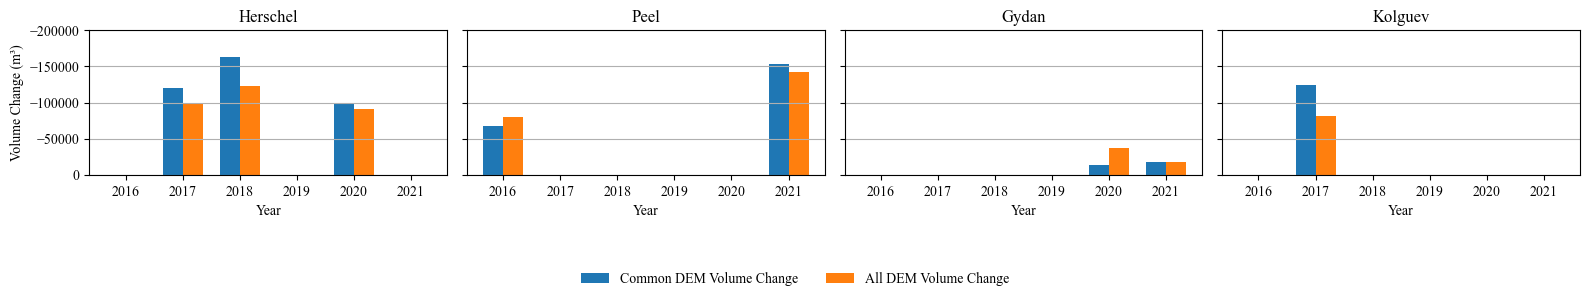

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Set the global font to Times New Roman
plt.rcParams["font.family"] = "Times New Roman"

# Function to plot the summary data for a region
def plot_summary_data_for_region(ax, region, summary_table, show_ylabel=False):
    bar_width = 0.35
    
    # Plot DEM volume changes
    ax.bar(summary_table['Year'] - bar_width/2, summary_table['Common_DEM_Volume_Change_Mean'], 
           bar_width, label='Common DEM Volume Change', color='#1f77b4')
    ax.bar(summary_table['Year'] + bar_width/2, summary_table['All_DEM_Volume_Change_Mean'], 
           bar_width, label='All DEM Volume Change', color='#ff7f0e')
    
    # Plot OT volume changes with error bars
    for label, color in zip(['Same', 'Previous', 'Following'], ['#2ca02c', '#d62728', '#9467bd']):
        normal_col = f'Common_OT_Normal_{label}_Mean'
        erosion_col = f'Common_OT_Erosion_{label}_Mean'
        dilation_col = f'Common_OT_Dilation_{label}_Mean'
        
        if normal_col in summary_table.columns:
            ax.errorbar(summary_table['Year'], summary_table[normal_col],
                        yerr=[summary_table[normal_col] - summary_table[dilation_col],
                              summary_table[erosion_col] - summary_table[normal_col]],
                        fmt='o', color=color, label=f'Common OT {label}', capsize=5)
        
        normal_col = f'All_OP_Normal_{label}_Mean'
        erosion_col = f'All_OP_Erosion_{label}_Mean'
        dilation_col = f'All_OP_Dilation_{label}_Mean'
        
        if normal_col in summary_table.columns:
            ax.errorbar(summary_table['Year'], summary_table[normal_col],
                        yerr=[summary_table[normal_col] - summary_table[dilation_col],
                              summary_table[erosion_col] - summary_table[normal_col]],
                        fmt='s', color=color, linestyle='--', label=f'All OP {label}', capsize=5)
    
    # Add labels and title
    ax.set_xlabel('Year')
    if show_ylabel:
        ax.set_ylabel('Volume Change (m³)')
    ax.set_title(f'{region.capitalize()}')
    ax.set_ylim(0, -200000)  # Set y-axis limit manually
    ax.grid(True, axis='y')

# Create a figure with subplots arranged in 1 row and 4 columns
fig, axs = plt.subplots(1, 4, figsize=(16, 3), sharex=True, sharey=True)

# Plot the mean values for each region
for i, region in enumerate(regions):
    summary_table = calculate_mean_values_for_region(region)
    show_ylabel = i == 0
    plot_summary_data_for_region(axs[i], region, summary_table, show_ylabel)

# Add a legend beneath the plot
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=4, frameon=False)

# Adjust layout and display the plot
plt.tight_layout()
plt.subplots_adjust(bottom=0.4)
plt.show()


c:\Users\Noe\anaconda3\envs\geo_env\Lib\site-packages\geopandas\geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
c:\Users\Noe\anaconda3\envs\geo_env\Lib\site-packages\geopandas\geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
c:\Users\Noe\anaconda3\envs\geo_env\Lib\site-packages\geopandas\geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

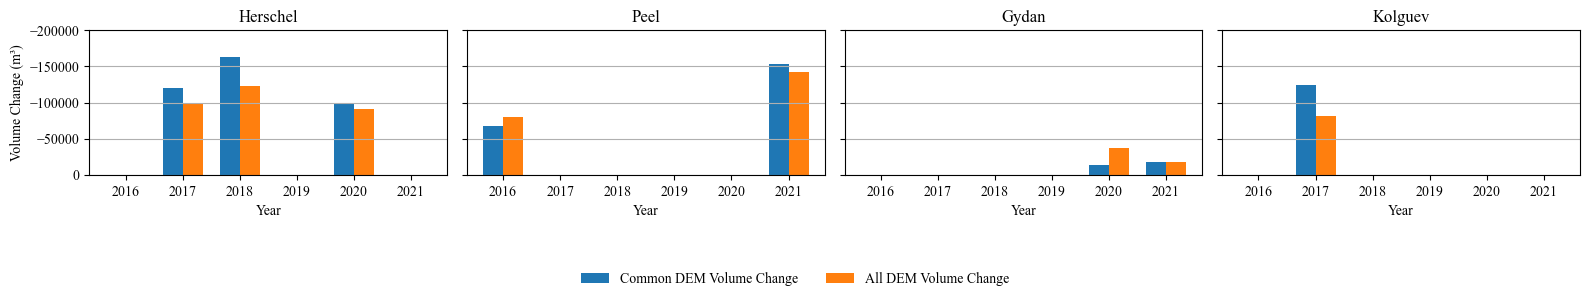

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Set the global font to Times New Roman
plt.rcParams["font.family"] = "Times New Roman"

# Function to plot the summary data for a region
def plot_summary_data_for_region(ax, region, summary_table, show_ylabel=False):
    bar_width = 0.35
    
    # Plot DEM volume changes
    ax.bar(summary_table['Year'] - bar_width/2, summary_table['Common_DEM_Volume_Change_Mean'], 
           bar_width, label='Common DEM Volume Change', color='#1f77b4')
    ax.bar(summary_table['Year'] + bar_width/2, summary_table['All_DEM_Volume_Change_Mean'], 
           bar_width, label='All DEM Volume Change', color='#ff7f0e')
    
    # Plot OT volume changes with error bars
    for label, color in zip(['Same', 'Previous', 'Following'], ['#2ca02c', '#d62728', '#9467bd']):
        normal_col = f'Common_OT_Normal_{label}_Mean'
        erosion_col = f'Common_OT_Erosion_{label}_Mean'
        dilation_col = f'Common_OT_Dilation_{label}_Mean'
        
        if normal_col in summary_table.columns:
            ax.errorbar(summary_table['Year'], summary_table[normal_col],
                        yerr=[summary_table[normal_col] - summary_table[dilation_col],
                              summary_table[erosion_col] - summary_table[normal_col]],
                        fmt='o', color=color, label=f'Common OT {label}', capsize=5)
        
        normal_col = f'All_OP_Normal_{label}_Mean'
        erosion_col = f'All_OP_Erosion_{label}_Mean'
        dilation_col = f'All_OP_Dilation_{label}_Mean'
        
        if normal_col in summary_table.columns:
            ax.errorbar(summary_table['Year'], summary_table[normal_col],
                        yerr=[summary_table[normal_col] - summary_table[dilation_col],
                              summary_table[erosion_col] - summary_table[normal_col]],
                        fmt='s', color=color, linestyle='--', label=f'All OP {label}', capsize=5)
    
    # Add labels and title
    ax.set_xlabel('Year')
    if show_ylabel:
        ax.set_ylabel('Volume Change (m³)')
    ax.set_title(f'{region.capitalize()}')
    ax.set_ylim(0, -200000)  # Set y-axis limit manually
    ax.grid(True, axis='y')

    # Plot OT and OP mean volume points with errors
    for label, color in zip(['Same', 'Previous', 'Following'], ['#2ca02c', '#d62728', '#9467bd']):
        common_ot_col = f'Common_OT_Normal_{label}_Mean'
        common_ot_erosion_col = f'Common_OT_Erosion_{label}_Mean'
        common_ot_dilation_col = f'Common_OT_Dilation_{label}_Mean'
        
        if common_ot_col in summary_table.columns:
            ax.errorbar(summary_table['Year'], summary_table[common_ot_col],
                        yerr=[summary_table[common_ot_col] - summary_table[common_ot_dilation_col],
                              summary_table[common_ot_erosion_col] - summary_table[common_ot_col]],
                        fmt='o', color=color, label=f'Common OT {label}', capsize=5)
        
        all_op_col = f'All_OP_Normal_{label}_Mean'
        all_op_erosion_col = f'All_OP_Erosion_{label}_Mean'
        all_op_dilation_col = f'All_OP_Dilation_{label}_Mean'
        
        if all_op_col in summary_table.columns:
            ax.errorbar(summary_table['Year'], summary_table[all_op_col],
                        yerr=[summary_table[all_op_col] - summary_table[all_op_dilation_col],
                              summary_table[all_op_erosion_col] - summary_table[all_op_col]],
                        fmt='s', color=color, linestyle='--', label=f'All OP {label}', capsize=5)

# Create a figure with subplots arranged in 1 row and 4 columns
fig, axs = plt.subplots(1, 4, figsize=(16, 3), sharex=True, sharey=True)

# Plot the mean values for each region
for i, region in enumerate(regions):
    summary_table = calculate_mean_values_for_region(region)
    show_ylabel = i == 0
    plot_summary_data_for_region(axs[i], region, summary_table, show_ylabel)

# Add a legend beneath the plot
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=4, frameon=False)

# Adjust layout and display the plot
plt.tight_layout()
plt.subplots_adjust(bottom=0.4)
plt.show()
